In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
plt.rc("font", family="serif")
plt.rc("text", usetex=True)

In [3]:
df_ = pd.read_csv('../processed_data/processed_lcs_ana.csv')
mask_microdet_ = (df_.mult_method_micro==1)|np.isnan(df_.mult_method_micro)|(df_.mag_method_micro==1)|np.isnan(df_.mag_method_micro)

#for i in df_.columns:
    #print(i)

In [4]:
df_out_nim2     = df_[(df_.nima==2.0)]                             # Doubles
df_out_nim4     = df_[(df_.nima==4.0)]                             # Quads
df_out_unlensed = df_[(df_['type']=='unlensed')&(df_.nima==1.0)]   # Unlensed
df_out_lensed   = df_[(df_['type']!='unlensed')]                   # All lenses

mask_microdet = (df_out_lensed.mult_method_micro==1)|(df_out_lensed.mag_method_micro==1)  # Mask for detected with microlensing

In [11]:
plots_path = '../results/figures/Results_0506/'


# 1D

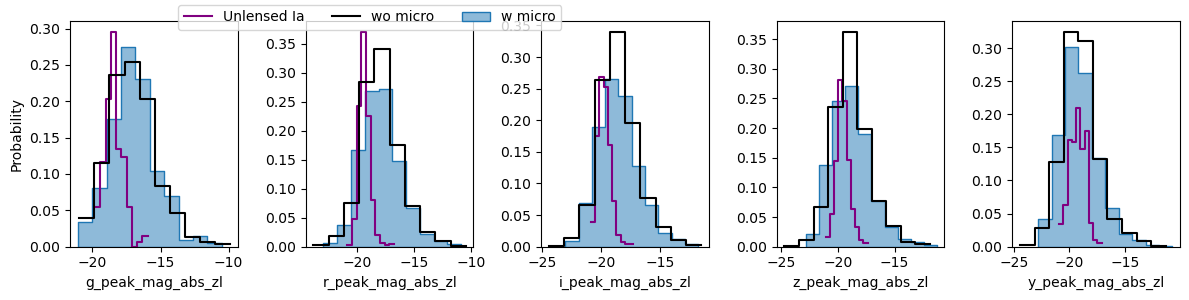

In [5]:
# Peakmags with and without microlensing

fig, ax = plt.subplots(1,5, figsize=(12,3))

stat = 'probability'

ax_ = ax[0]
sns.histplot(df_out_unlensed             ,x='g_peak_mag_abs_zl'      , weights=1/df_out_unlensed['g_peak_mag_err_abs_zl']                   , stat=stat, element='step',color='purple',fill=False, alpha=1,legend=True,label='Ia' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed               ,x='g_peak_mag_abs_zl'      , weights=1/df_out_lensed['g_peak_mag_err_abs_zl']                     , stat=stat, element='step',color='black',fill=False,legend=True, label='wo micro' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed[mask_microdet],x='g_peak_mag_micro_abs_zl', weights=1/df_out_lensed['g_peak_mag_err_micro_abs_zl'][mask_microdet], stat=stat, element='step'              ,fill=True, alpha=.5,legend=True,label='w micro' ,cumulative=False, 
             ax=ax_)


ax_ = ax[1]
sns.histplot(df_out_unlensed             ,x='r_peak_mag_abs_zl'      , weights=1/df_out_unlensed['r_peak_mag_err_abs_zl']                   , stat=stat, element='step',color='purple',fill=False, alpha=1,legend=True,label='Ia' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed               ,x='r_peak_mag_abs_zl'      , weights=1/df_out_lensed['r_peak_mag_err_abs_zl']      , stat=stat, element='step',color='black',fill=False,legend=True, label='wo micro' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed[mask_microdet],x='r_peak_mag_micro_abs_zl', weights=1/df_out_lensed['r_peak_mag_err_micro_abs_zl'], stat=stat, element='step',fill=True, alpha=.5,legend=True,label='w micro' ,cumulative=False, 
             ax=ax_)

ax_ = ax[2]
sns.histplot(df_out_unlensed             ,x='i_peak_mag_abs_zl'      , weights=1/df_out_unlensed['i_peak_mag_err_abs_zl']                   , stat=stat, element='step',color='purple',fill=False, alpha=1,legend=True,label='Ia' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed               ,x='i_peak_mag_abs_zl'      , weights=1/df_out_lensed['i_peak_mag_err_abs_zl']      , stat=stat, element='step',color='black',fill=False,legend=True, label='wo micro' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed[mask_microdet],x='i_peak_mag_micro_abs_zl', weights=1/df_out_lensed['i_peak_mag_err_micro_abs_zl'], stat=stat, element='step',fill=True, alpha=.5,legend=True,label='w micro' ,cumulative=False, 
             ax=ax_)

ax_ = ax[3]
sns.histplot(df_out_unlensed             ,x='z_peak_mag_abs_zl'      , weights=1/df_out_unlensed['z_peak_mag_err_abs_zl']                   , stat=stat, element='step',color='purple',fill=False, alpha=1,legend=True,label='Ia' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed               ,x='z_peak_mag_abs_zl'      , weights=1/df_out_lensed['z_peak_mag_err_abs_zl']      , stat=stat, element='step',color='black',fill=False,legend=True, label='wo micro' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed[mask_microdet],x='z_peak_mag_micro_abs_zl', weights=1/df_out_lensed['z_peak_mag_err_micro_abs_zl'], stat=stat, element='step',fill=True, alpha=.5,legend=True,label='w micro' ,cumulative=False, 
             ax=ax_)

ax_ = ax[4]
sns.histplot(df_out_unlensed             ,x='y_peak_mag_abs_zl'      , weights=1/df_out_unlensed['y_peak_mag_err_abs_zl']                   , stat=stat, element='step',color='purple',fill=False, alpha=1,legend=True,label='Ia' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed               ,x='y_peak_mag_abs_zl'      , weights=1/df_out_lensed['y_peak_mag_err_abs_zl']      , stat=stat, element='step',color='black',fill=False,legend=True, label='wo micro' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed[mask_microdet],x='y_peak_mag_micro_abs_zl', weights=1/df_out_lensed['y_peak_mag_err_micro_abs_zl'], stat=stat, element='step',fill=True, alpha=.5,legend=True,label='w micro' ,cumulative=False, 
             ax=ax_)

fig.legend(labels=[ 'Unlensed Ia', 'wo micro', 'w micro'], loc=(0.15,0.9), ncol=3)
ax[1].set_ylabel('')
ax[2].set_ylabel('')
ax[3].set_ylabel('')
ax[4].set_ylabel('')

plt.tight_layout()
#plt.savefig( plots_path+'peakmags_abs_zl')# 
plt.show()


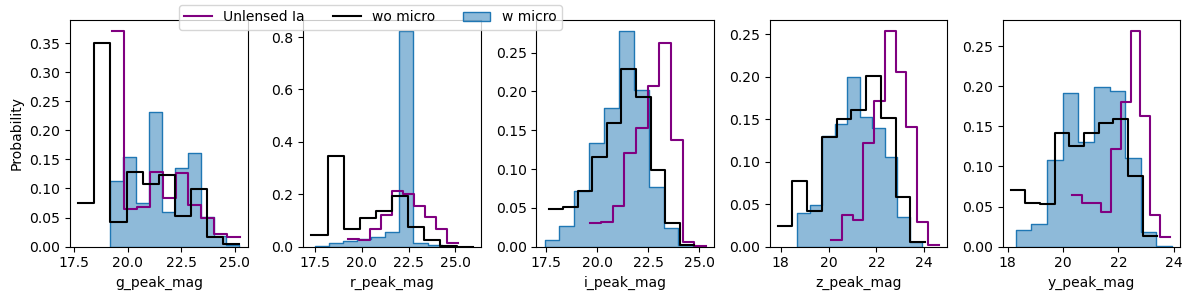

In [6]:
# Peakmags with and without microlensing

fig, ax = plt.subplots(1,5, figsize=(12,3))

stat = 'probability'

ax_ = ax[0]
sns.histplot(df_out_unlensed             ,x='g_peak_mag'      , weights=1/df_out_unlensed['g_peak_mag_err']                   , stat=stat, element='step',color='purple',fill=False, alpha=1,legend=True,label='Ia' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed               ,x='g_peak_mag'      , weights=1/df_out_lensed['g_peak_mag_err']                     , stat=stat, element='step',color='black',fill=False,legend=True, label='wo micro' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed[mask_microdet],x='g_peak_mag_micro', weights=1/df_out_lensed['g_peak_mag_err_micro'][mask_microdet], stat=stat, element='step'              ,fill=True, alpha=.5,legend=True,label='w micro' ,cumulative=False, 
             ax=ax_)


ax_ = ax[1]
sns.histplot(df_out_unlensed             ,x='r_peak_mag'      , weights=1/df_out_unlensed['r_peak_mag_err']                   , stat=stat, element='step',color='purple',fill=False, alpha=1,legend=True,label='Ia' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed               ,x='r_peak_mag'      , weights=1/df_out_lensed['r_peak_mag_err']      , stat=stat, element='step',color='black',fill=False,legend=True, label='wo micro' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed[mask_microdet],x='r_peak_mag_micro', weights=1/df_out_lensed['r_peak_mag_err_micro'], stat=stat, element='step',fill=True, alpha=.5,legend=True,label='w micro' ,cumulative=False, 
             ax=ax_)

ax_ = ax[2]
sns.histplot(df_out_unlensed             ,x='i_peak_mag'      , weights=1/df_out_unlensed['i_peak_mag_err']                   , stat=stat, element='step',color='purple',fill=False, alpha=1,legend=True,label='Ia' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed               ,x='i_peak_mag'      , weights=1/df_out_lensed['i_peak_mag_err']      , stat=stat, element='step',color='black',fill=False,legend=True, label='wo micro' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed[mask_microdet],x='i_peak_mag_micro', weights=1/df_out_lensed['i_peak_mag_err_micro'], stat=stat, element='step',fill=True, alpha=.5,legend=True,label='w micro' ,cumulative=False, 
             ax=ax_)

ax_ = ax[3]
sns.histplot(df_out_unlensed             ,x='z_peak_mag'      , weights=1/df_out_unlensed['z_peak_mag_err']                   , stat=stat, element='step',color='purple',fill=False, alpha=1,legend=True,label='Ia' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed               ,x='z_peak_mag'      , weights=1/df_out_lensed['z_peak_mag_err']      , stat=stat, element='step',color='black',fill=False,legend=True, label='wo micro' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed[mask_microdet],x='z_peak_mag_micro', weights=1/df_out_lensed['z_peak_mag_err_micro'], stat=stat, element='step',fill=True, alpha=.5,legend=True,label='w micro' ,cumulative=False, 
             ax=ax_)

ax_ = ax[4]
sns.histplot(df_out_unlensed             ,x='y_peak_mag'      , weights=1/df_out_unlensed['y_peak_mag_err']                   , stat=stat, element='step',color='purple',fill=False, alpha=1,legend=True,label='Ia' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed               ,x='y_peak_mag'      , weights=1/df_out_lensed['y_peak_mag_err']      , stat=stat, element='step',color='black',fill=False,legend=True, label='wo micro' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed[mask_microdet],x='y_peak_mag_micro', weights=1/df_out_lensed['y_peak_mag_err_micro'], stat=stat, element='step',fill=True, alpha=.5,legend=True,label='w micro' ,cumulative=False, 
             ax=ax_)

fig.legend(labels=[ 'Unlensed Ia', 'wo micro', 'w micro'], loc=(0.15,0.9), ncol=3)
ax[1].set_ylabel('')
ax[2].set_ylabel('')
ax[3].set_ylabel('')
ax[4].set_ylabel('')

plt.tight_layout()
#plt.savefig( plots_path+'peakmags_app')# 
plt.show()


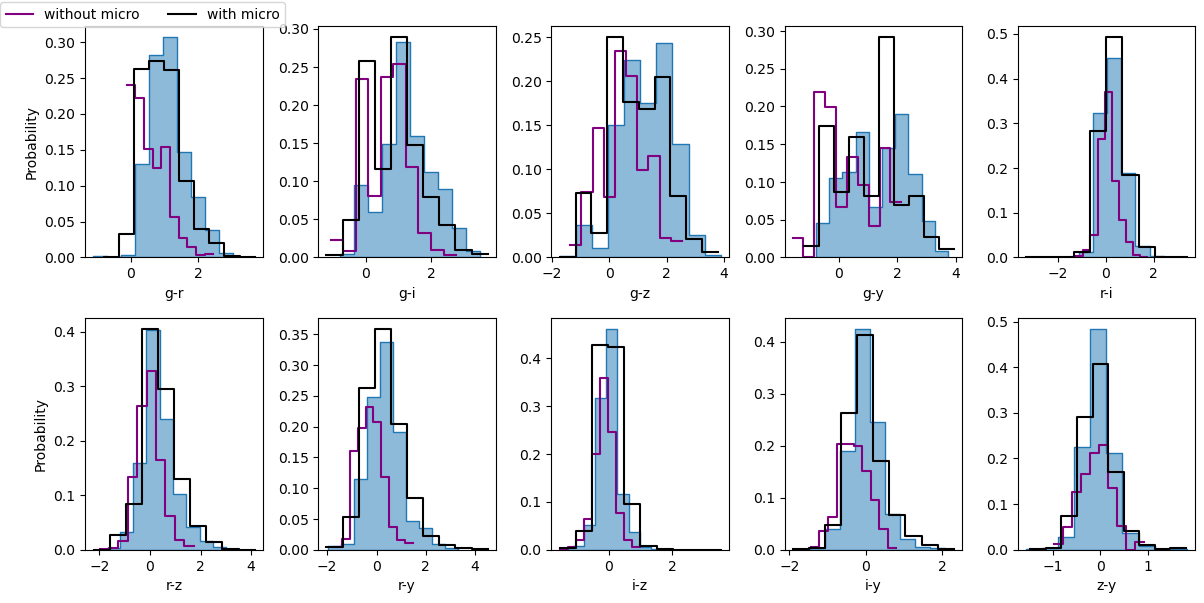

In [7]:
# colors with and without microlensing

fig, ax = plt.subplots(2,5, figsize=(12,6))

ax_ = ax[0,0]
sns.histplot(df_out_unlensed             ,x='g-r'      , weights=1/df_out_unlensed['g-r_err']                   , stat=stat, element='step',color='purple',fill=False, alpha=1,legend=True,label='Ia' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed               ,      x='g-r', weights=1/df_out_lensed['g-r_err']                     , stat='probability', element='step',color='black',fill=False,legend=True, label='wo micro' ,cumulative=False, ax=ax_)
sns.histplot(df_out_lensed[mask_microdet],x='g-r_micro', weights=1/df_out_lensed[mask_microdet]['g-r_err_micro'], stat='probability', element='step',fill=True, alpha=.5,legend=True,label='w micro' ,cumulative=False, ax=ax_)

ax_ = ax[0,1]
sns.histplot(df_out_unlensed             ,x='g-i'      , weights=1/df_out_unlensed['g-i_err']                   , stat=stat, element='step',color='purple',fill=False, alpha=1,legend=True,label='Ia' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed               ,      x='g-i', weights=1/df_out_lensed[               'g-i_err']      , stat='probability', element='step',color='black',fill=False,legend=True, label='wo micro' ,cumulative=False,  ax=ax_)
sns.histplot(df_out_lensed[mask_microdet],x='g-i_micro', weights=1/df_out_lensed[mask_microdet]['g-i_err_micro'], stat='probability', element='step',fill=True, alpha=.5,legend=True,label='w micro' ,cumulative=False,  ax=ax_)

ax_ = ax[0,2]
sns.histplot(df_out_unlensed             ,x='g-z'      , weights=1/df_out_unlensed['g-z_err']                   , stat=stat, element='step',color='purple',fill=False, alpha=1,legend=True,label='Ia' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed,               x='g-z'      , weights=1/df_out_lensed[               'g-z_err']      , stat='probability', element='step',color='black',fill=False,legend=True, label='wo micro' ,cumulative=False,  ax=ax_)
sns.histplot(df_out_lensed[mask_microdet],x='g-z_micro', weights=1/df_out_lensed[mask_microdet]['g-z_err_micro'], stat='probability', element='step',fill=True, alpha=.5,legend=True,label='w micro' ,cumulative=False,  ax=ax_)

ax_ = ax[0,3]
sns.histplot(df_out_unlensed             ,x='g-y'      , weights=1/df_out_unlensed['g-y_err']                   , stat=stat, element='step',color='purple',fill=False, alpha=1,legend=True,label='Ia' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed,               x='g-y'      , weights=1/df_out_lensed[               'g-y_err']      , stat='probability', element='step',color='black',fill=False,legend=True, label='wo micro' ,cumulative=False, ax=ax_)
sns.histplot(df_out_lensed[mask_microdet],x='g-y_micro', weights=1/df_out_lensed[mask_microdet]['g-y_err_micro'], stat='probability', element='step',fill=True, alpha=.5,legend=True,label='w micro' ,cumulative=False, ax=ax_)

ax_ = ax[0,4]
sns.histplot(df_out_unlensed             ,x='r-i'      , weights=1/df_out_unlensed['r-i_err']                   , stat=stat, element='step',color='purple',fill=False, alpha=1,legend=True,label='Ia' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed               ,x='r-i'      , weights=1/df_out_lensed[               'r-i_err']      , stat='probability', element='step',color='black',fill=False,legend=True, label='wo micro' ,cumulative=False, ax=ax_)
sns.histplot(df_out_lensed[mask_microdet],x='r-i_micro', weights=1/df_out_lensed[mask_microdet]['r-i_err_micro'], stat='probability', element='step',fill=True, alpha=.5,legend=True,label='w micro' ,cumulative=False, ax=ax_)

ax_ = ax[1,0]
sns.histplot(df_out_unlensed             ,x='r-z'      , weights=1/df_out_unlensed['r-z_err']                   , stat=stat, element='step',color='purple',fill=False, alpha=1,legend=True,label='Ia' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed               ,x='r-z'      , weights=1/df_out_lensed[               'r-z_err']      , stat='probability', element='step',color='black',fill=False,legend=True, label='wo micro' ,cumulative=False, ax=ax_)
sns.histplot(df_out_lensed[mask_microdet],x='r-z_micro', weights=1/df_out_lensed[mask_microdet]['r-z_err_micro'], stat='probability', element='step',fill=True, alpha=.5,legend=True,label='w micro' ,cumulative=False, ax=ax_)

ax_ = ax[1,1]
sns.histplot(df_out_unlensed             ,x='r-y'      , weights=1/df_out_unlensed['r-y_err']                   , stat=stat, element='step',color='purple',fill=False, alpha=1,legend=True,label='Ia' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed               ,x='r-y'      , weights=1/df_out_lensed[               'r-y_err']      , stat='probability', element='step',color='black',fill=False,legend=True, label='wo micro' ,cumulative=False, ax=ax_)
sns.histplot(df_out_lensed[mask_microdet],x='r-y_micro', weights=1/df_out_lensed[mask_microdet]['r-y_err_micro'], stat='probability', element='step',fill=True, alpha=.5,legend=True,label='w micro' ,cumulative=False, ax=ax_)

ax_ = ax[1,2]
sns.histplot(df_out_unlensed             ,x='i-z'      , weights=1/df_out_unlensed['i-z_err']                   , stat=stat, element='step',color='purple',fill=False, alpha=1,legend=True,label='Ia' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed               ,x='i-z'      , weights=1/df_out_lensed[               'i-z_err']      , stat='probability', element='step',color='black',fill=False,legend=True, label='wo micro' ,cumulative=False, ax=ax_)
sns.histplot(df_out_lensed[mask_microdet],x='i-z_micro', weights=1/df_out_lensed[mask_microdet]['i-z_err_micro'], stat='probability', element='step',fill=True, alpha=.5,legend=True,label='w micro' ,cumulative=False, ax=ax_)

ax_ = ax[1,3]
sns.histplot(df_out_unlensed             ,x='i-y'      , weights=1/df_out_unlensed['i-y_err']                   , stat=stat, element='step',color='purple',fill=False, alpha=1,legend=True,label='Ia' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed               ,x='i-y'      , weights=1/df_out_lensed[               'i-y_err']      , stat='probability', element='step',color='black',fill=False,legend=True, label='wo micro' ,cumulative=False, ax=ax_)
sns.histplot(df_out_lensed[mask_microdet],x='i-y_micro', weights=1/df_out_lensed[mask_microdet]['i-y_err_micro'], stat='probability', element='step',fill=True, alpha=.5,legend=True,label='w micro' ,cumulative=False, ax=ax_)

ax_ = ax[1,4]
sns.histplot(df_out_unlensed             ,x='z-y'      , weights=1/df_out_unlensed['z-y_err']                   , stat=stat, element='step',color='purple',fill=False, alpha=1,legend=True,label='Ia' ,cumulative=False, 
             ax=ax_)
sns.histplot(df_out_lensed               ,x='z-y'      , weights=1/df_out_lensed[               'z-y_err']      , stat='probability', element='step',color='black',fill=False,legend=True, label='wo micro' ,cumulative=False, ax=ax_)
sns.histplot(df_out_lensed[mask_microdet],x='z-y_micro', weights=1/df_out_lensed[mask_microdet]['z-y_err_micro'], stat='probability', element='step',fill=True, alpha=.5,legend=True,label='w micro' ,cumulative=False, ax=ax_)


fig.legend(labels=['without micro', 'with micro'], loc=(0.,0.955), ncol=2)
ax[0,1].set_ylabel('')
ax[0,2].set_ylabel('')
ax[0,3].set_ylabel('')
ax[0,4].set_ylabel('')
ax[1,1].set_ylabel('')
ax[1,2].set_ylabel('')
ax[1,3].set_ylabel('')
ax[1,4].set_ylabel('')

plt.tight_layout()
#plt.savefig( plots_path + 'colors')# 
plt.show()


# 2D

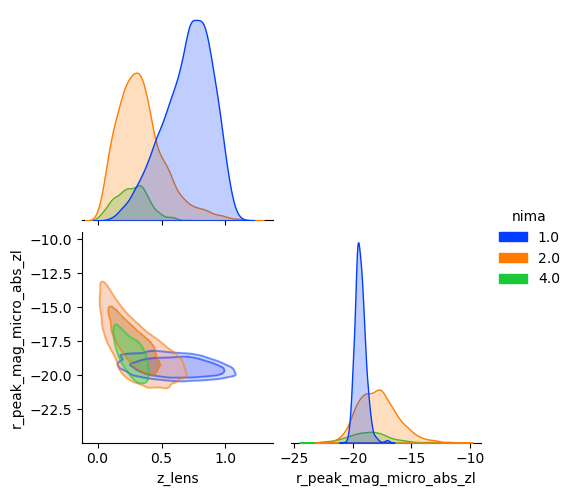

'Many lensed supernovae would appear at lower redshifts than unlensed Ias, \nassuming the redshift of the lensed galaxy.\nTherefore, many would look like intrinsically fainter, mostly for the lowest z_lens.'

In [8]:
cols = ['z_lens', 'r_peak_mag_micro_abs_zl', 'nima']
g = sns.pairplot(df_[mask_microdet_][cols], corner=True, kind='kde', hue='nima', palette='bright',
                 plot_kws={'alpha':.5, 'fill':True, 'levels':[1-.9,1-.68,1], 'commom_norm':False})
g.map_lower(sns.kdeplot, alpha=.5, fill=False, levels=[1-.9,1-.68,1], commom_norm=False)
#plt.savefig(plots_path+'corner_nimahue_micro.pdf')
plt.show()



'''Many lensed supernovae would appear at lower redshifts than unlensed Ias, 
assuming the redshift of the lensed galaxy.
Therefore, many would look like intrinsically fainter, mostly for the lowest z_lens.'''

In [19]:
def plot_sepresolved(xx,yy, df, savefig=None):
    df_micro_lens_ = df_[df_.nima!=1]
    df_micro_unlen = df_[df_.nima==1]
    df_out_resolved_nim2 = df_[(df_.nima==2 ) & (df_['type']=='resolved') ]
    df_out_unresolved_nim2 = df_[(df_.nima==2 ) & (df_['type']=='unresolved') ]
    df_out_resolved_nim4   = df_[(df_.nima==4 ) & (df_['type']=='resolved') ]
    df_out_unresolved_nim4 = df_[(df_.nima==4 ) & (df_['type']=='unresolved') ]
    
    plt.figure()
    plt.scatter(       df_micro_unlen[xx],        df_micro_unlen[yy]  ,alpha=.81, color='red',marker='s', label='Unlensed')
    plt.scatter(  df_out_resolved_nim2[xx],   df_out_resolved_nim2[yy]  ,alpha=0.2, color='blue', label='Resolved doubles')
    plt.scatter(df_out_unresolved_nim2[xx], df_out_unresolved_nim2[yy]  ,alpha=0.2, color='blue',facecolors='none', label='Unresolved doubles')
    plt.scatter(  df_out_resolved_nim4[xx],   df_out_resolved_nim4[yy]  ,alpha=0.2, color='green', label='Resolved quads')
    plt.scatter(df_out_unresolved_nim4[xx], df_out_unresolved_nim4[yy]  ,alpha=0.2, color='green',facecolors='none',  label='Unresolved quads')
    plt.legend(loc=0)
    plt.xlabel(xx)
    plt.ylabel(yy)
    #plt.ylim(-1,3)
    if savefig is not None:
        plt.savefig(plots_path+'sepresolved_'+savefig)
    plt.show()


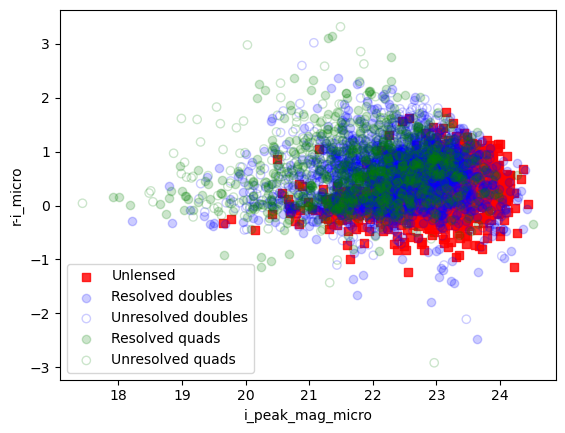

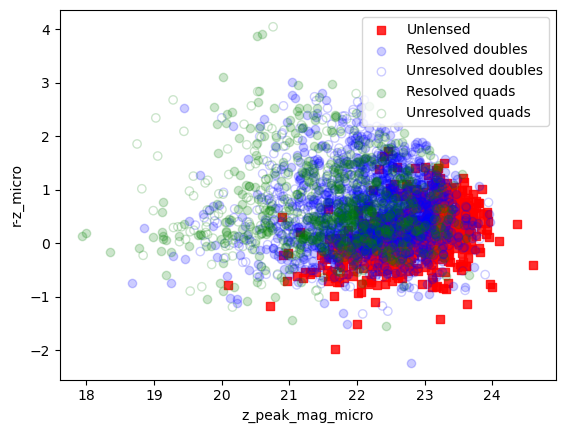

In [20]:
#xx = 'r_peak_mag_micro'
#yy = 'r-i_micro'
#plot_(xx, yy, df_[mask_microdet_], savefig='r-i_r.pdf')

xx = 'i_peak_mag_micro'
yy = 'r-i_micro'
plot_sepresolved(xx, yy, df_[mask_microdet_], savefig='r-i_i.pdf')

#xx = 'r_peak_mag_micro'
#yy = 'r-z_micro'
#plot_(xx, yy, df_[mask_microdet_], savefig='r-z_r.pdf')

xx = 'z_peak_mag_micro'
yy = 'r-z_micro'
plot_sepresolved(xx, yy, df_[mask_microdet_], savefig='r-z_z.pdf')

In [63]:
def colour_mag_cut(mz):
    return mz - 22



def plot_(xx_label, yy_label, xx, yy, df, savefig=None):
    df_micro_lens_ = df_[df_.nima!=1]
    df_micro_unlen = df_[df_.nima==1]
    df_out_resolved_nim2 = df_[(df_.nima==2 ) & (df_['type']=='resolved') ]
    df_out_unresolved_nim2 = df_[(df_.nima==2 ) & (df_['type']=='unresolved') ]
    df_out_resolved_nim4   = df_[(df_.nima==4 ) & (df_['type']=='resolved') ]
    df_out_unresolved_nim4 = df_[(df_.nima==4 ) & (df_['type']=='unresolved') ]
    
    ei = 5000
    color_gold = '#e6c700'
    
    x_cut = np.linspace(17, 26)
    y_cut = colour_mag_cut(x_cut)
    
    plt.figure(figsize=(5,5))
    plt.scatter(       df_micro_unlen[xx][:ei],        df_micro_unlen[yy][:ei]  ,alpha=1, color='#73c7de',marker='D', label='Unlensed')
    #plt.scatter(  df_out_resolved_nim2[xx],   df_out_resolved_nim2[yy]  ,alpha=0.2, color='blue', label='Resolved doubles')
    #plt.scatter(df_out_unresolved_nim2[xx], df_out_unresolved_nim2[yy]  ,alpha=0.2, color='blue',facecolors='none', label='Unresolved doubles')
    #plt.scatter(  df_out_resolved_nim4[xx],   df_out_resolved_nim4[yy]  ,alpha=0.2, color='green', label='Resolved quads')
    #plt.scatter(df_out_unresolved_nim4[xx], df_out_unresolved_nim4[yy]  ,alpha=0.2, color='green',facecolors='none',  label='Unresolved quads')
    plt.scatter(df_micro_lens_[xx][:ei], df_micro_lens_[yy][:ei]  ,alpha=0.2, color='#ed1c38',  label='Lensed')
    plt.plot(x_cut, y_cut, '--', color='#383838', lw=1)
    
    plt.legend(loc=0, fontsize=15)
    plt.xlabel(xx_label, fontsize=15)
    plt.ylabel(yy_label, fontsize=15)
    plt.xlim(17.5, 25)
    plt.ylim(-2.3, 4.3)
    #plt.ylim(-1,3)
    if savefig is not None:
        plt.savefig(plots_path+savefig)
    plt.show()

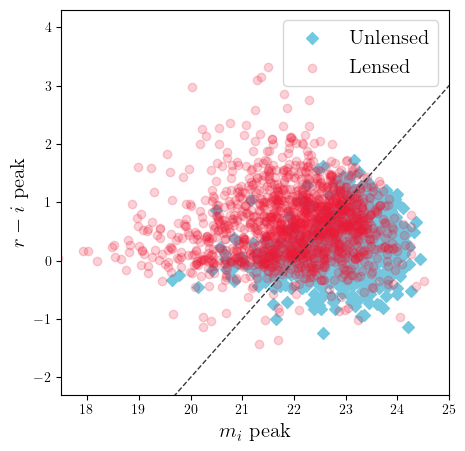

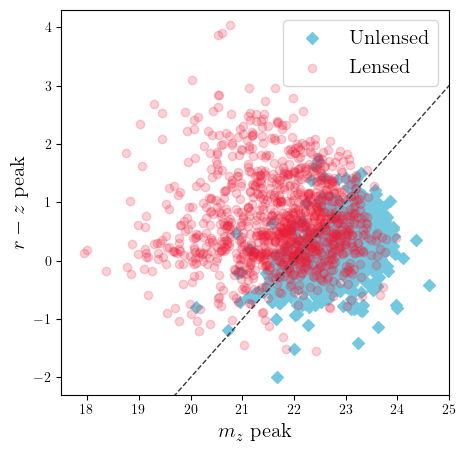

In [62]:
xx_label = r'$m_i$ peak'
yy_label = r'$r-i$ peak'
xx = 'i_peak_mag_micro'
yy = 'r-i_micro'
plot_(xx_label, yy_label, xx, yy, df_[mask_microdet_], savefig='r-i_i.pdf')

#xx = 'r_peak_mag_micro'
#yy = 'r-z_micro'
#plot_(xx, yy, df_[mask_microdet_], savefig='r-z_r.pdf')

xx_label = r'$m_z$ peak'
yy_label = r'$r-z$ peak'
xx = 'z_peak_mag_micro'
yy = 'r-z_micro'
plot_(xx_label, yy_label, xx, yy, df_[mask_microdet_], savefig='r-z_z.pdf')

## Add the golden sample

In [78]:
gold_read = np.genfromtxt('../processed_data/sumstat_earlydet.txt',
                  dtype=['U15', np.float, np.float, np.float, np.float, np.float, np.float])[1:]
gold = []
for g in gold_read:
    g_ = np.array([float(g[0][2:]), g[1], g[2], g[3], g[4], g[5], g[6]])
    gold.append(g_)
gold = np.array(gold)

print(np.shape(gold))
print("Columns: SNID  Npremax Nfilt obs_start   theta_E     mB      dt_input")
print(list(gold[0]))
print(list(gold[1]))

(299, 7)
Columns: SNID  Npremax Nfilt obs_start   theta_E     mB      dt_input
[210.0, 5.0, 3.0, 60893.25921814481, 0.4565501306068267, 21.914673110408856, 4.610165613029292]
[211.0, 1.0, 1.0, 60714.34873414719, 0.07950907088158646, 22.391653222750918, 0.3099460383604242]


7.0


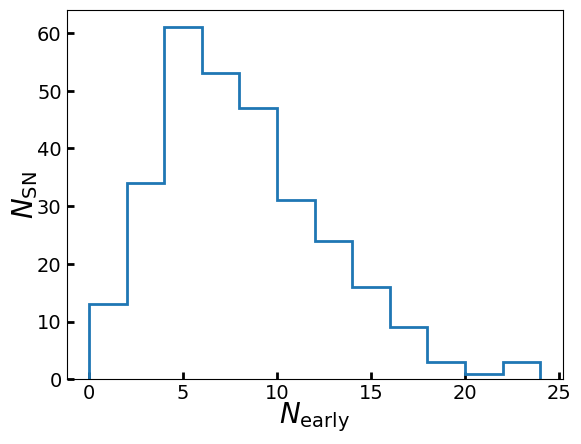

In [80]:
ndet = gold[:,1]
plt.hist(ndet, histtype='step', linewidth=2, bins=np.arange(0, 25, 2))
plt.xlabel(r'$N_{\rm early}$', fontsize=20, labelpad=-2)
plt.ylabel(r'$N_{\rm SN}$', fontsize=20, labelpad=-2)
plt.tick_params(labelsize=14, length=5, width=2, direction="in")
print(np.median(ndet.astype('float32')))

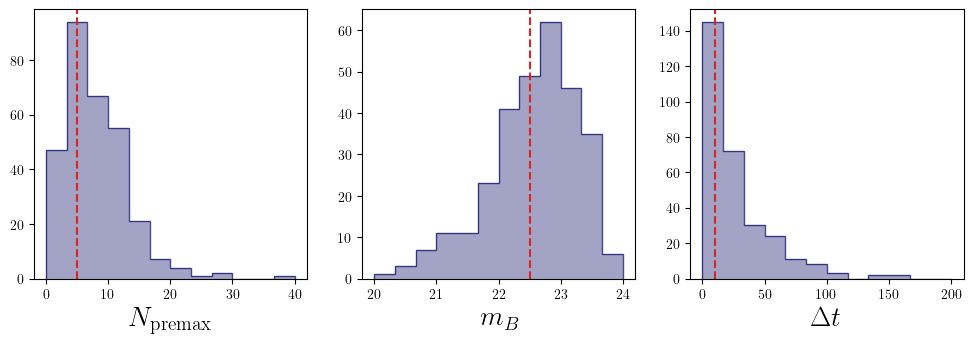

In [139]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3.5))

properties = [gold[:,1], gold[:,5], gold[:,6]]
ranges = [(0, 40), (20, 24), (0, 200)]
labels = [r'$N_{\rm premax}$', r'$m_B$', r'$\Delta t$']
limits = [5, 22.5, 10]
bins=12

for i in range(3):
    ax[i].hist(properties[i], range=ranges[i], alpha=0.4, color='Midnightblue', bins=bins)
    ax[i].hist(properties[i], range=ranges[i], alpha=0.8, color='Midnightblue', histtype='step',  bins=bins)
    ax[i].axvline(x=limits[i], color='C3', ls='--')
    ax[i].set_xlabel(labels[i], fontsize=20)
    
#plt.savefig("../Results/Figures/Results_0506/Goldsample.png", transparent=False, facecolor='white', dpi=250, bbox_inches='tight')

In [161]:
dt_indices = np.where(gold[:,6] >= 10)[0]
gold_indices = np.where((gold[:,1] >= 5) & (gold[:,5] <= 22.5) & (gold[:,6] >= 10))[0]
print(len(gold_indices), len(gold[dt_indices]))
print(len(gold_indices)/len(gold[dt_indices]))
print(" ")

dt_indices = np.where(gold[:,6] >= 10)[0]
gold_indices_d = np.where((gold_detected[:,1] >= 5) & (gold_detected[:,5] <= 22.5) & (gold_detected[:,6] >= 10))[0]
early_indices_d = np.where((gold_detected[:,1] >= 5))[0]
print(len(gold_indices_d), len(gold_detected), len(index_detected_wfd))
print(len(gold_indices_d)/len(index_detected_wfd))
print(len(early_indices_d))
print(len(early_indices_d)/len(index_detected_wfd))

47 196
0.23979591836734693
 
30 161 341
0.08797653958944282
132
0.3870967741935484


In [163]:
print(7/np.sqrt(4*5))
print(47 * 0.3870967741935484)

1.5652475842498528
18.193548387096772


In [160]:
print(gold_detected[0])

[2.10000000e+02 5.00000000e+00 3.00000000e+00 6.08932592e+04
 4.56550131e-01 2.19146731e+01 4.61016561e+00]


(array([28., 27., 29., 23., 34., 33., 27., 30., 38., 30.]),
 array([210. , 288.8, 367.6, 446.4, 525.2, 604. , 682.8, 761.6, 840.4,
        919.2, 998. ]),
 <BarContainer object of 10 artists>)

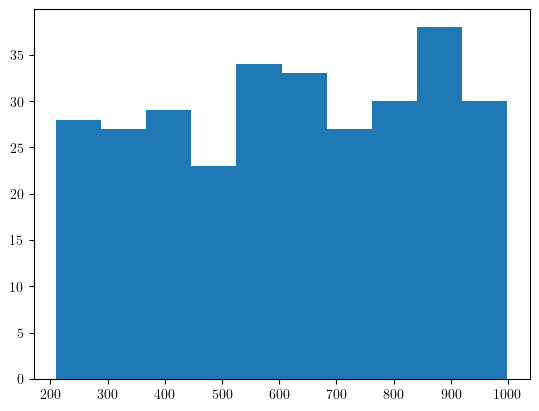

In [144]:
plt.hist(gold[:,0])

In [154]:
inside = []
gold_detected = []

for i in range(len(gold)):
    inside.append(gold[i,0] in index_detected_wfd)
    if gold[i,0] in index_detected_wfd:
        gold_detected.append(gold[i])
        
inside = np.array(inside)
gold_detected = np.array(gold_detected)
    
print(len(gold_detected))
print(inside.sum())

161
161


In [147]:
index_detected_wfd = np.array([1,
 6,
 9,
 10,
 11,
 16,
 18,
 24,
 29,
 33,
 34,
 36,
 38,
 42,
 45,
 51,
 52,
 54,
 55,
 57,
 58,
 62,
 63,
 67,
 69,
 70,
 71,
 72,
 74,
 81,
 84,
 85,
 93,
 94,
 108,
 110,
 114,
 119,
 120,
 121,
 124,
 125,
 128,
 129,
 136,
 137,
 143,
 146,
 155,
 160,
 162,
 164,
 167,
 170,
 171,
 172,
 173,
 177,
 181,
 184,
 186,
 188,
 189,
 190,
 191,
 197,
 201,
 203,
 206,
 207,
 210,
 215,
 221,
 225,
 226,
 228,
 230,
 233,
 238,
 240,
 246,
 253,
 257,
 258,
 262,
 270,
 273,
 275,
 277,
 278,
 281,
 282,
 283,
 286,
 297,
 298,
 300,
 302,
 305,
 307,
 308,
 310,
 312,
 313,
 314,
 321,
 323,
 328,
 330,
 335,
 336,
 338,
 345,
 347,
 349,
 350,
 352,
 358,
 360,
 363,
 365,
 366,
 367,
 368,
 370,
 372,
 374,
 378,
 390,
 394,
 395,
 399,
 400,
 403,
 405,
 409,
 412,
 413,
 414,
 415,
 418,
 420,
 426,
 428,
 429,
 436,
 438,
 442,
 446,
 448,
 455,
 457,
 461,
 462,
 466,
 468,
 472,
 479,
 483,
 485,
 489,
 501,
 507,
 509,
 510,
 511,
 512,
 514,
 517,
 522,
 523,
 524,
 527,
 529,
 530,
 533,
 536,
 538,
 546,
 547,
 555,
 561,
 567,
 571,
 572,
 574,
 577,
 579,
 580,
 582,
 587,
 594,
 596,
 598,
 600,
 603,
 606,
 611,
 615,
 616,
 617,
 620,
 627,
 630,
 632,
 637,
 638,
 642,
 650,
 651,
 657,
 660,
 664,
 666,
 670,
 677,
 679,
 680,
 681,
 684,
 687,
 688,
 690,
 692,
 694,
 697,
 698,
 701,
 702,
 703,
 708,
 709,
 712,
 717,
 718,
 719,
 730,
 733,
 736,
 738,
 744,
 748,
 754,
 756,
 759,
 761,
 764,
 766,
 768,
 772,
 773,
 774,
 778,
 782,
 784,
 786,
 787,
 788,
 790,
 796,
 797,
 798,
 799,
 802,
 808,
 809,
 811,
 814,
 816,
 822,
 823,
 828,
 829,
 833,
 835,
 840,
 842,
 843,
 844,
 848,
 850,
 854,
 855,
 857,
 861,
 863,
 866,
 867,
 871,
 872,
 873,
 874,
 875,
 876,
 881,
 886,
 887,
 888,
 890,
 894,
 898,
 900,
 904,
 909,
 911,
 913,
 919,
 920,
 922,
 923,
 925,
 927,
 934,
 935,
 938,
 939,
 940,
 944,
 945,
 946,
 951,
 954,
 955,
 958,
 959,
 965,
 966,
 970,
 971,
 972,
 975,
 976,
 980,
 983,
 984,
 985,
 989,
 993,
 995,
 997,
 998])